# Task 1 - Exploratory Data Analysis

---

## Section 1 - Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## Section 2 - Data loading using Pandas
Loading `sample_sales_data.csv` dataset so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the read_csv method accordingly.

In [125]:
sales_data = pd.read_csv(r"C:\Users\Mr.Hassan\DataspellProjects\Gala Foods\sample_sales_data.csv")

---

## Section 3 - Descriptive statistics

In this section, we try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get started,this is an explanation of what the column names mean

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

### Data Types

In [126]:
sales_data.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [127]:
sales_data.info()
#There are no null values in this data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


### Statistics

In [128]:
sales_data.describe()
#We might have skewed data columns here

,Unnamed: 0,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905
std,2260.181962,5.388088,1.122722,17.446680
min,0.000000,0.190000,1.000000,0.190000
25%,1957.000000,3.990000,1.000000,6.570000
50%,3914.000000,7.190000,3.000000,14.970000
75%,5871.000000,11.190000,4.000000,28.470000
max,7828.000000,23.990000,4.000000,95.960000


---

## Section 4 - Visualisation

Now that we have computed some descriptive statistics of the dataset, let's create some visualisations.

In [129]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
    sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
    sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect,order=data[column].value_counts().index).set(title=f'Distribution of {column}')

def correlation_plot(data: pd.DataFrame = None):
    corr = data.corr()
    corr.style.background_gradient(cmap='coolwarm')
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
    # Axis ticks size
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

To analyse the dataset, below are snippets of helper functions to visualise different columns within the dataset.

- plot_continuous_distribution = this is to visualise the distribution of numeric columns

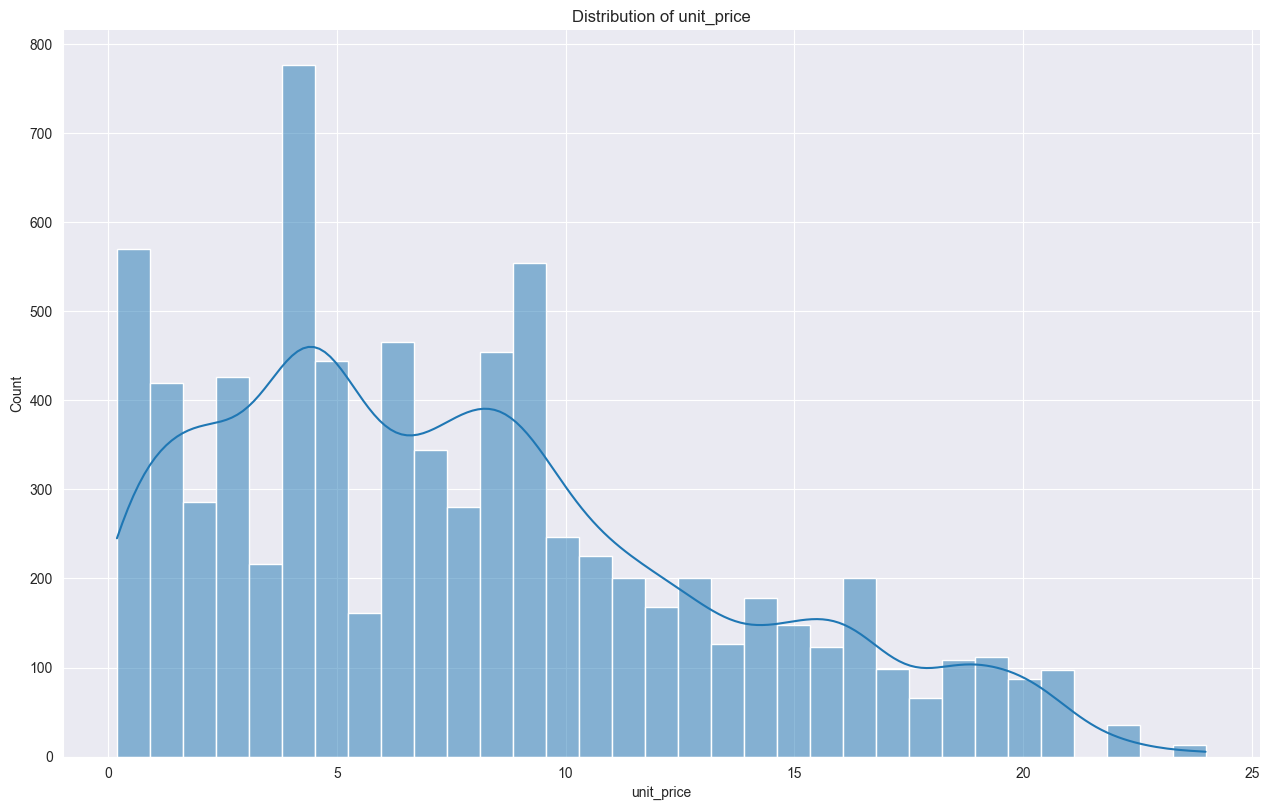

In [130]:
plot_continuous_distribution(sales_data,"unit_price")

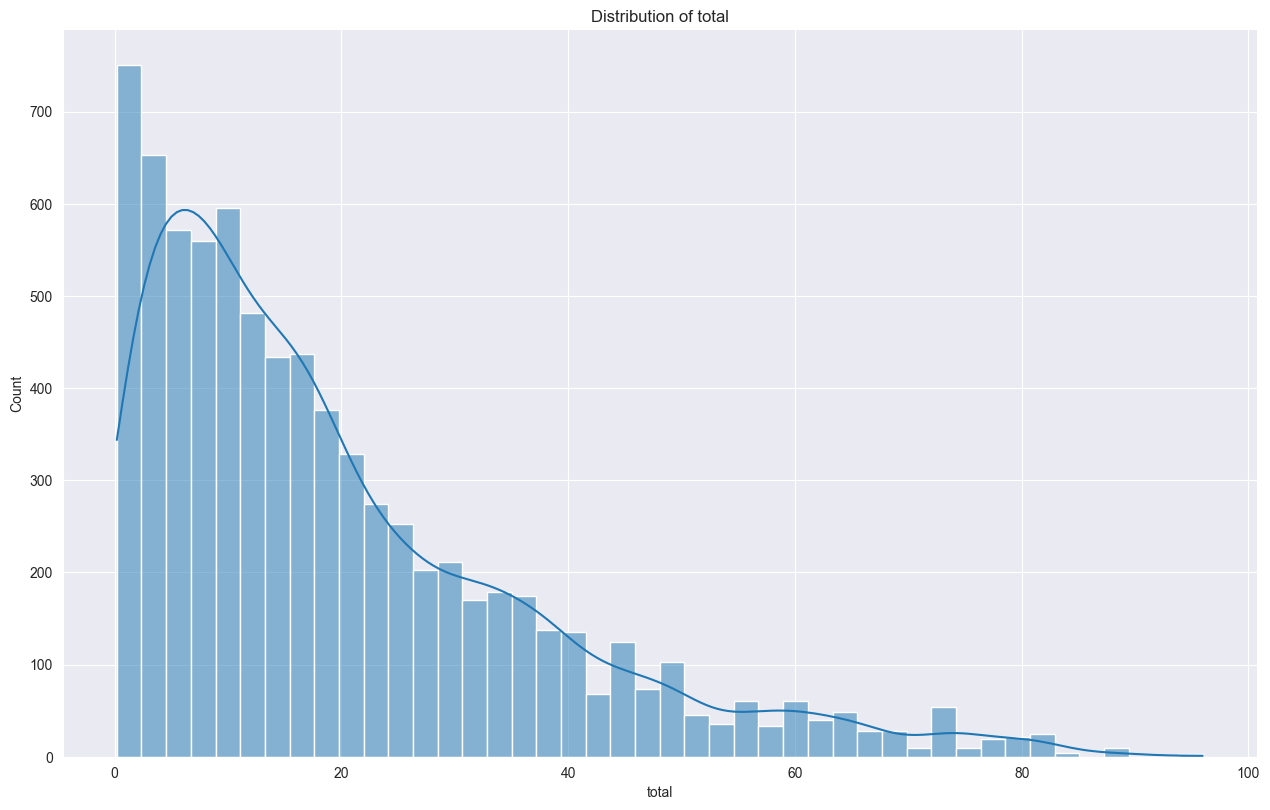

In [131]:
plot_continuous_distribution(sales_data,"total")

- plot_categorical_distribution = this is to visualise the distribution of categorical columns

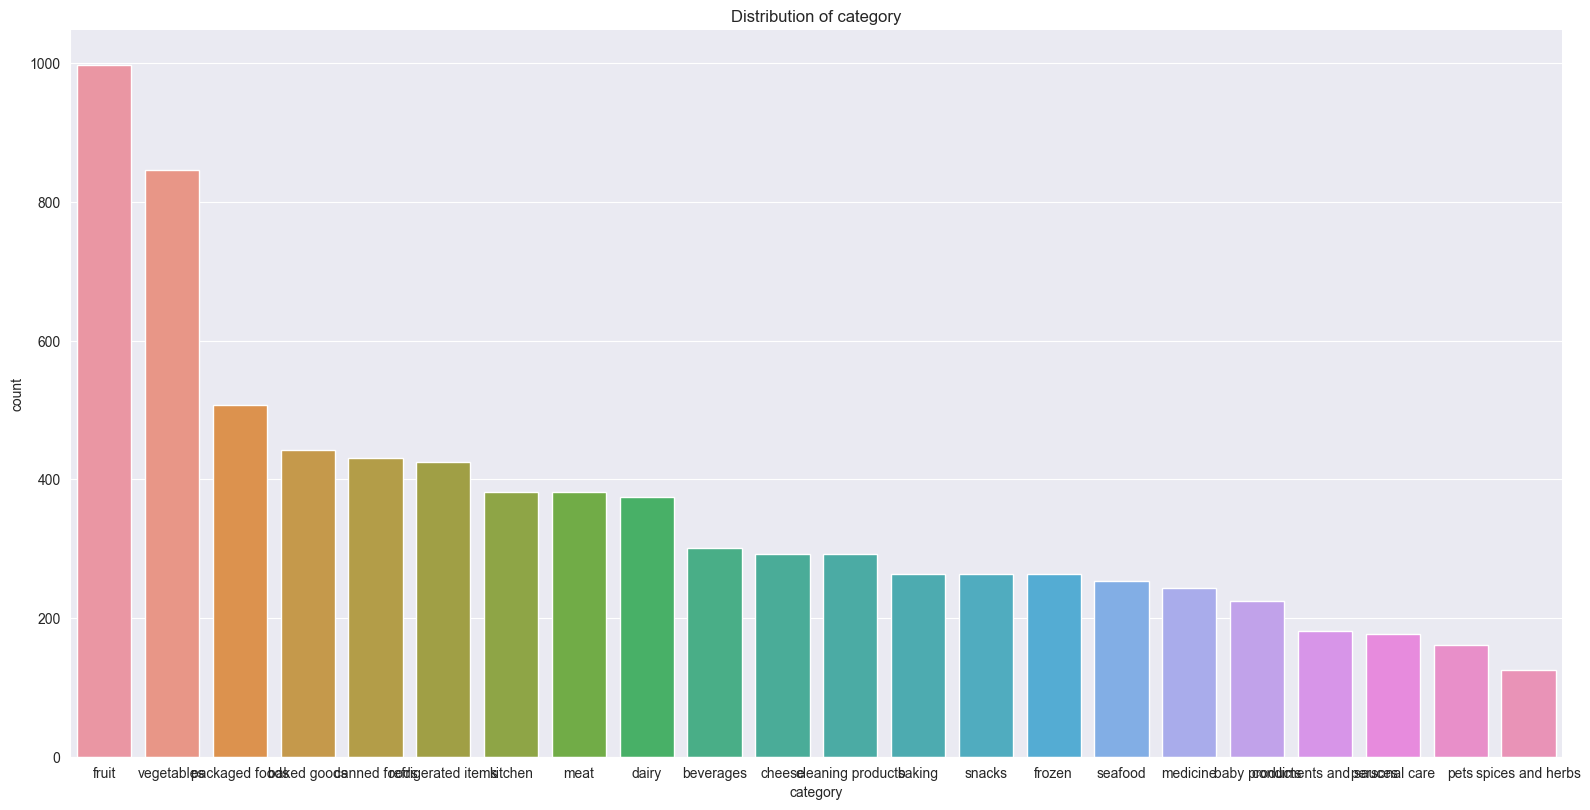

In [132]:
plot_categorical_distribution(sales_data,"category")

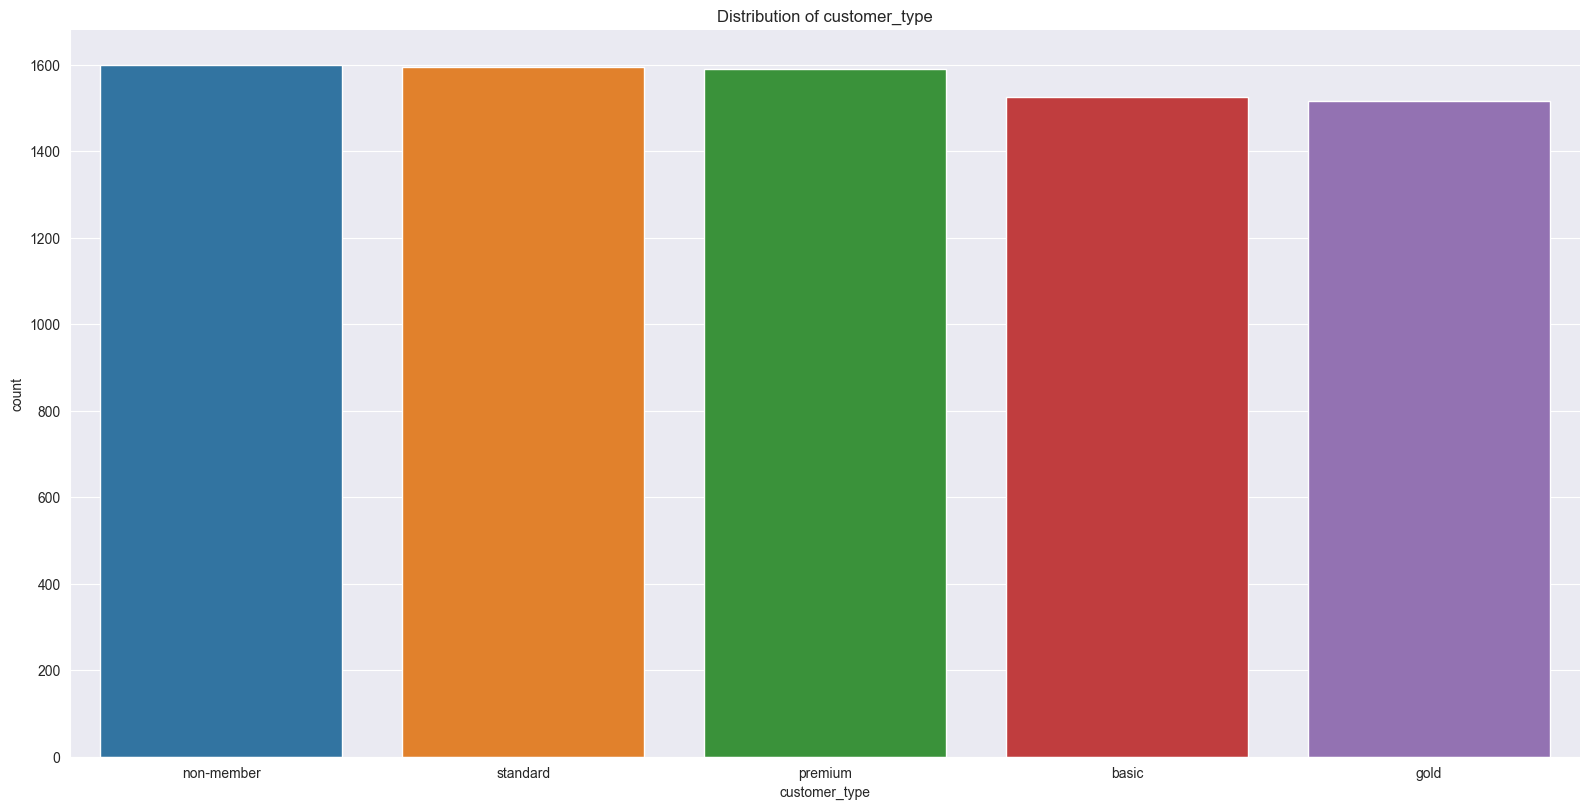

In [133]:
plot_categorical_distribution(sales_data,"customer_type")

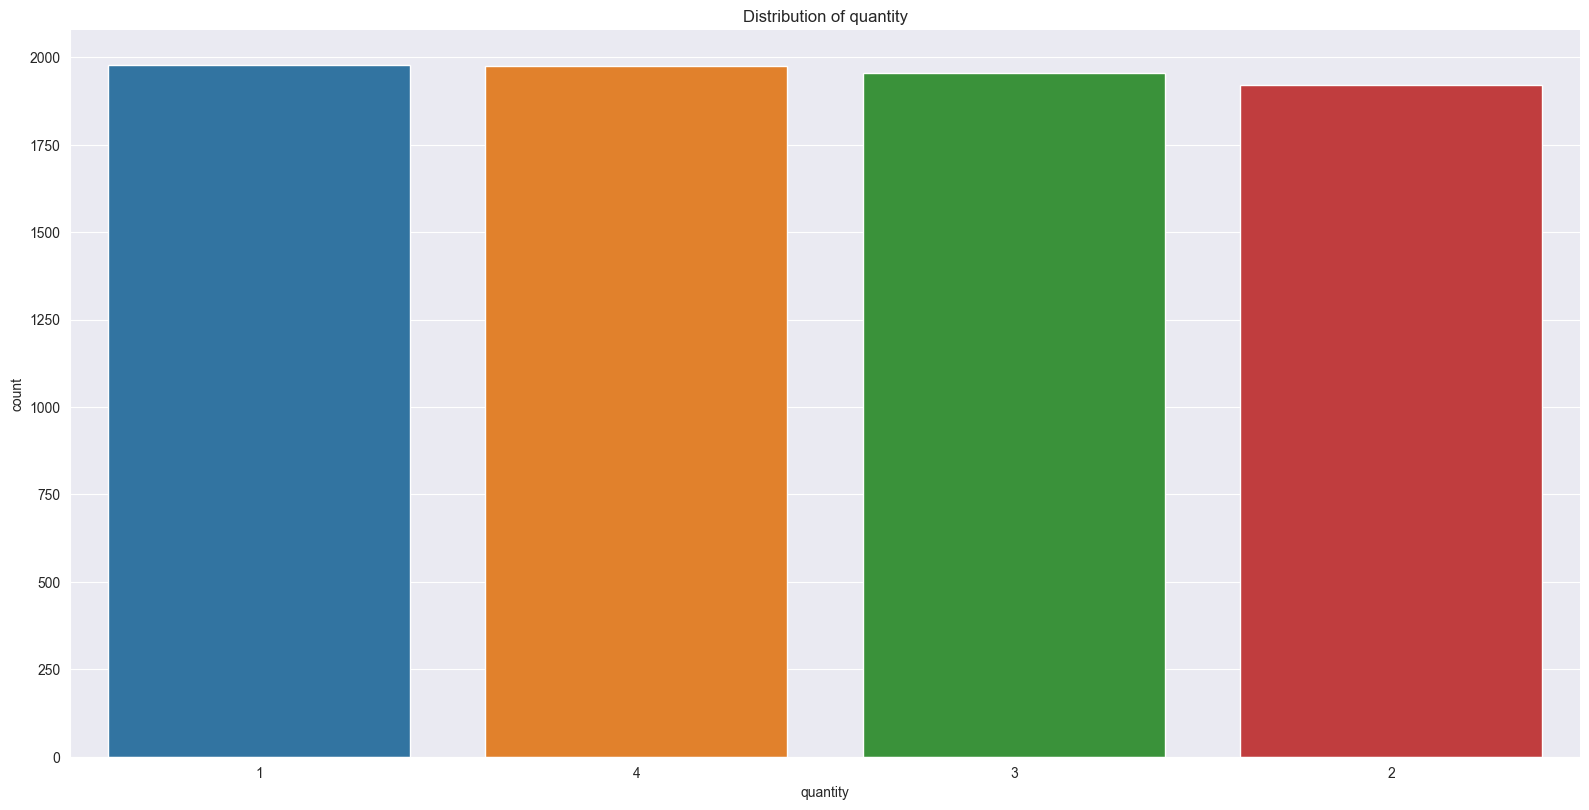

In [134]:
plot_categorical_distribution(sales_data,"quantity")

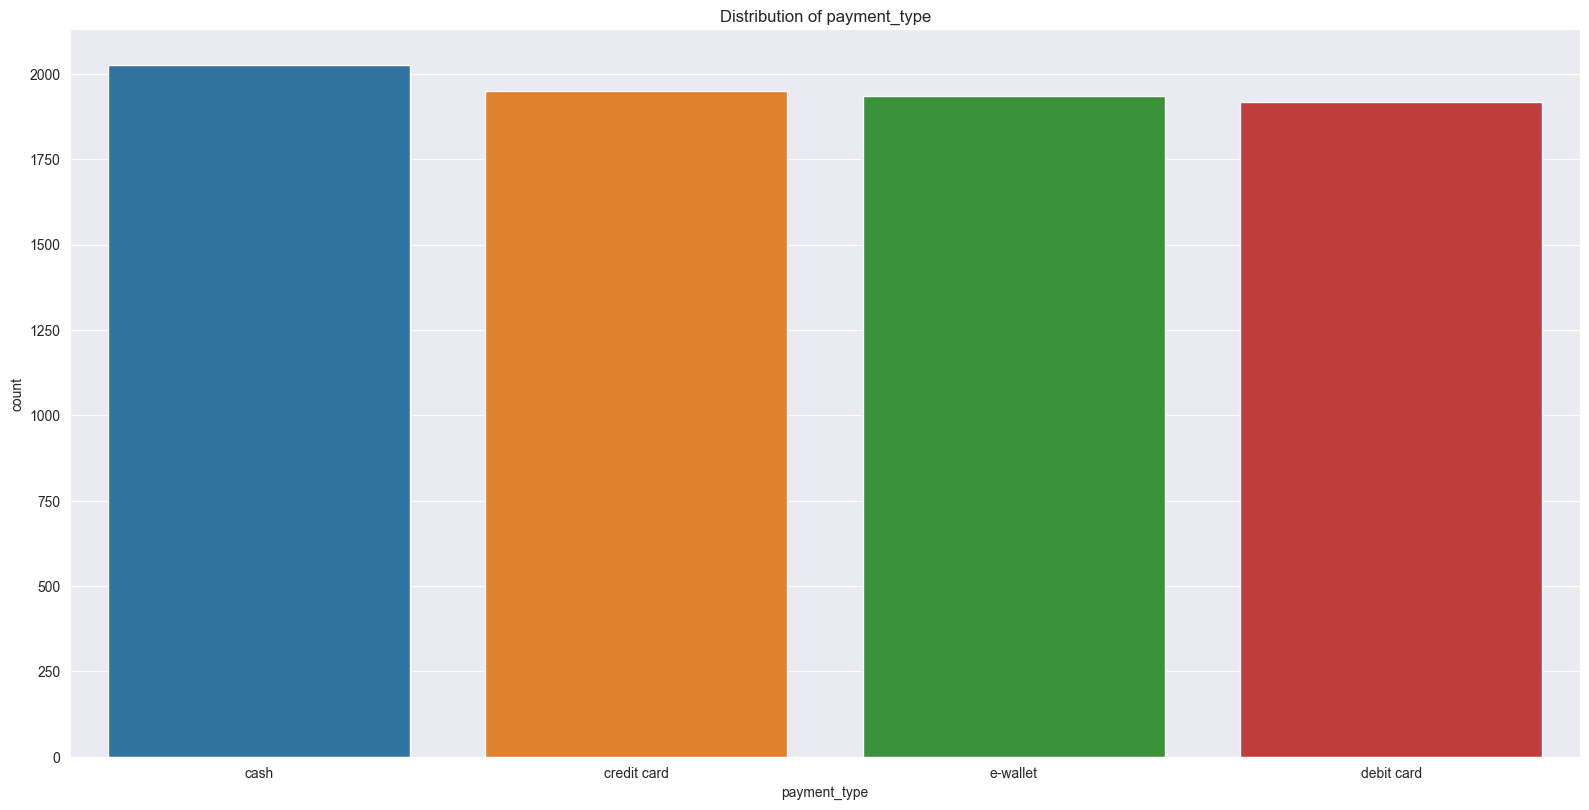

In [135]:
plot_categorical_distribution(sales_data,"payment_type")

- correlation_plot = this is to plot the correlations between the numeric columns within the data

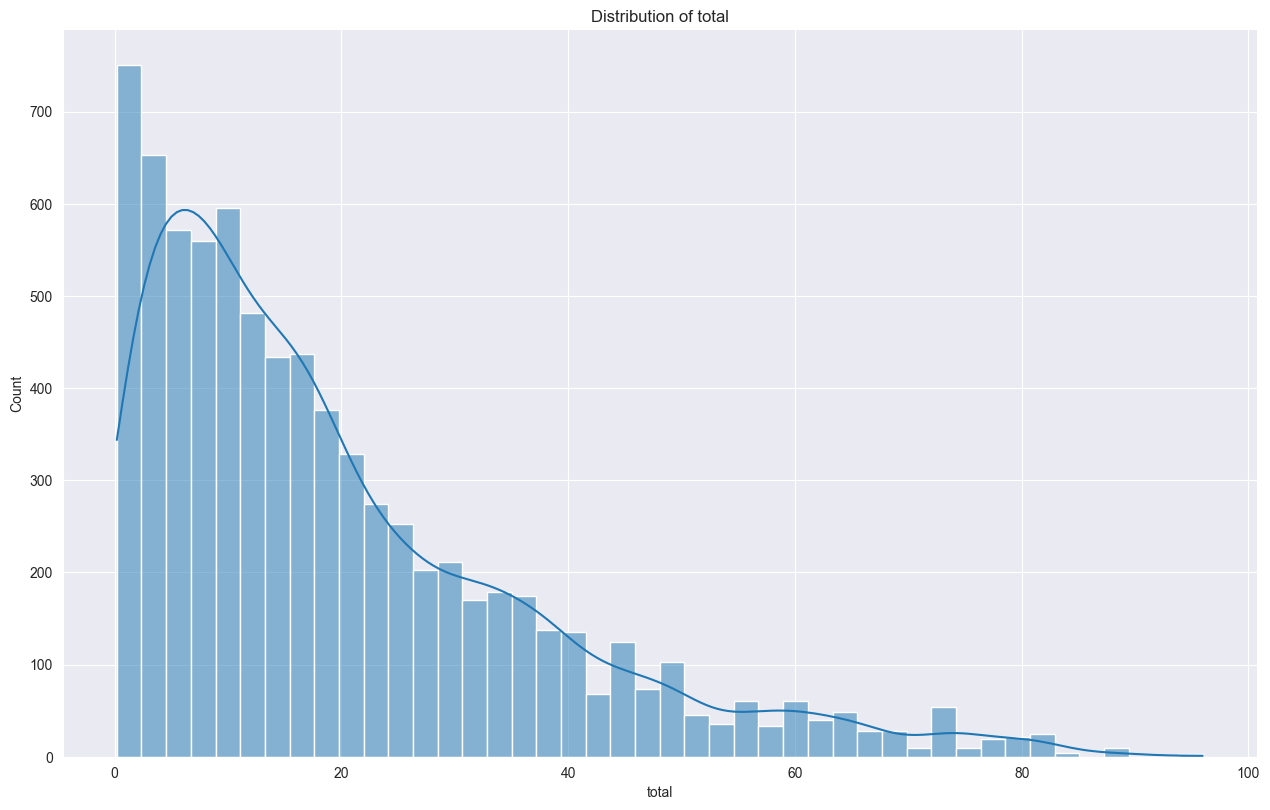

In [138]:
plot_continuous_distribution(sales_data,"total")

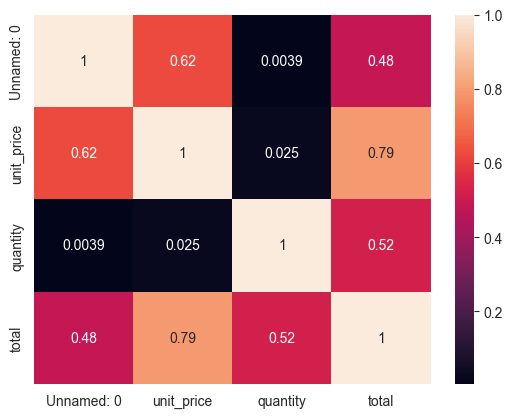

In [136]:
correlation_plot(sales_data)

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.
I found the following insights as part of the analysis:
- Fruit & vegetables are the 2 most frequently bought product categories
- Non-members are the most frequent buyers within the store
- Cash is the most frequently used payment method

`DISCREPANCY`

The client wants to know
`"How to better stock the items that they sell"`
From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for